In [1]:
%pylab inline

import os
import styles.paper

Populating the interactive namespace from numpy and matplotlib


In [2]:
idir = os.path.expandvars("$master/notebooks/data/G05Indexes/stelib")
odir = os.path.expandvars("$HOME/Documents/Publications/photofit_near_paper")

ax_xlabel = {
    "age": r"\bf \log{t/\text{yr}}"
}
ax_ylabels = {
    "D4000": r"\bf D$4000$",
    "Hbeta": r"\bf H$\beta$",
    "Hdg": r"\bf H$\delta_A$+H$\gamma_A$",
    "Mg2Fe": r"\bf [Mg${}_2$Fe]",
    "MgFep": r"\bf [MgFe]'",
    "u-r": r"\bf $u-r$"
}
libraries = {
    "stelib": {
        "m32": r"\bf0.0004",
        "m42": r"\bf0.0040",
        "m52": r"\bf0.0080",
        "m62": r"\bf0.0200",
        "m72": r"\bf0.0500"
    },
    "miles": {
        "z001": r"\bf0.001",
        "z004": r"\bf0.004",
        "z008": r"\bf0.008",
        "z017": r"\bf0.017",
        "z030": r"\bf0.030",
        "z040": r"\bf0.040"
        
    }
}

file_maps = {
    "tau0": {
        "6lsindx_sed": {
            "age": 0,
            "Mg2": 12,
            "Hbeta": 9,
            "Fe4531": 7,
            "Fe5015": 10,
            "Mgb": 13,
        },
        "7lsindx_sed": {
            "Fe5270": 1,
            "Fe5335": 2,
            "Hdelta_A": 9,
            "Hgamma_A": 10,
            "D4000": 13
        }
    },
    "tau2": {
        "w_age": {
            "age": (5, log10)
        },
        "6lsindx_sed": {
            "Mg2": 12,
            "Hbeta": 9,
            "Fe4531": 7,
            "Fe5015": 10,
            "Mgb": 13,
        },
        "7lsindx_sed": {
            "Fe5270": 1,
            "Fe5335": 2,
            "Hdelta_A": 9,
            "Hgamma_A": 10,
            "D4000": 13
        }
    },
    "tau5": {
        "w_age": {
            "age": (5, log10)
        },
        "6lsindx_sed": {
            "Mg2": 12,
            "Hbeta": 9,
            "Fe4531": 7,
            "Fe5015": 10,
            "Mgb": 13,
        },
        "7lsindx_sed": {
            "Fe5270": 1,
            "Fe5335": 2,
            "Hdelta_A": 9,
            "Hgamma_A": 10,
            "D4000": 13
        }
    }
}

Mg2Fe = lambda Mg2, Fe4531, Fe5015: 0.6*Mg2 + 0.4*log10(abs(Fe4531+Fe5015))
MgFep = lambda Mgb, Fe5270, Fe5335: sqrt(abs(Mgb*(0.72*Fe5270+0.28*Fe5335)))
Hdg = lambda Hdelta, Hgamma: Hdelta + Hgamma

def walk_map(library, model):
    return {
        zkw: {
            field: loadtxt("{}/{}_{}.{}".format(idir,model,zkw,ftype), usecols=(icol,)) if not hasattr(icol, "__getitem__") else icol[1](loadtxt("{}/{}_{}.{}".format(idir,model,zkw,ftype), usecols=(icol[0],))) for ftype in file_maps[model] for field, icol in file_maps[model][ftype].iteritems()
        } for zkw in libraries[library]
    }

def add_ingredient(stores, ingredients_list, directions, ingredient_name):
    for store in stores.values():
        store[ingredient_name] = directions(*tuple(store[ingredient] for ingredient in ingredients_list))
    return None

tau0_stelib = walk_map("stelib", "tau0")
tau2_stelib = walk_map("stelib", "tau2")
tau5_stelib = walk_map("stelib", "tau5")

add_ingredient(tau0_stelib, ("Mg2","Fe4531","Fe5015"), Mg2Fe, "Mg2Fe")
add_ingredient(tau0_stelib, ("Mgb","Fe5270","Fe5335"), MgFep, "MgFep")
add_ingredient(tau0_stelib, ("Hdelta_A","Hgamma_A"), Hdg, "Hdg")

add_ingredient(tau2_stelib, ("Mg2","Fe4531","Fe5015"), Mg2Fe, "Mg2Fe")
add_ingredient(tau2_stelib, ("Mgb","Fe5270","Fe5335"), MgFep, "MgFep")
add_ingredient(tau5_stelib, ("Hdelta_A","Hgamma_A"), Hdg, "Hdg")

add_ingredient(tau5_stelib, ("Mg2","Fe4531","Fe5015"), Mg2Fe, "Mg2Fe")
add_ingredient(tau5_stelib, ("Mgb","Fe5270","Fe5335"), MgFep, "MgFep")
add_ingredient(tau5_stelib, ("Hdelta_A","Hgamma_A"), Hdg, "Hdg")

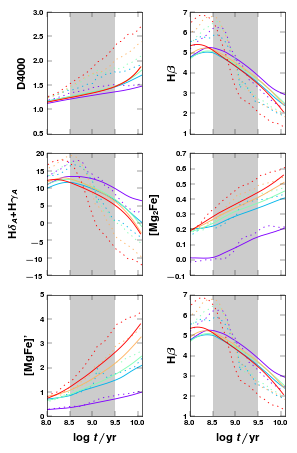

In [3]:
colors = cm.rainbow(linspace(0,1,len(libraries["stelib"])))
properties = ["D4000", "Hbeta", "Hdg", "Mg2Fe", "MgFep", "Hbeta"]

fig, axs = subplots(3, 2, sharex=True, figsize=(3.3,5))
xlim(8.0,10.1)

axs = axs.ravel()
for i in xrange(axs.size):
    prop = properties[i]
    
    axs[i].set_ylabel(ax_ylabels[prop])
    if axs[i].is_last_row(): axs[i].set_xlabel(ax_xlabel["age"])
    
    for j, zkw in enumerate(sorted(libraries["stelib"])):
        axs[i].plot(tau0_stelib[zkw]["age"], tau0_stelib[zkw][prop], ":", lw=0.7, color=colors[j])
        axs[i].plot(tau5_stelib[zkw]["age"], tau5_stelib[zkw][prop], "-", lw=0.7, color=colors[j])
        axs[i].axvspan(8.5, 9.5, lw=0, fc="none", hatch=15*"/", color="0.8")

fig.tight_layout()
fig.subplots_adjust(wspace=0.5)

#fig.savefig("{}/g05_indexes".format(odir))

NameError: name 'lsindx6' is not defined

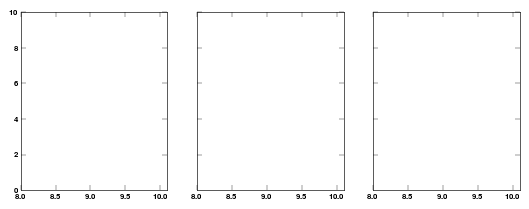

In [4]:
fig, axs = subplots(1, 3, sharey=True, sharex=True, figsize=(7,2.5))
xlim(8.0, 10.1)
ylim(1e-2, 1e1)

MLum = [
    {
        "tau0": loadtxt("{}/tau0_m{}2.4color".format(idir,i)),
        "tau2": loadtxt("{}/tau2_m{}2.4color".format(idir,i)),
        "tau5": loadtxt("{}/tau5_m{}2.4color".format(idir,i))
    }  for i in xrange(3,8)
]
mlr_tau0, mlr_tau2, mlr_tau5 = {}, {}, {}
con_tau0, con_tau2, con_tau5 = {}, {}, {}
for i in xrange(len(lsindx6)):
    mlr_tau0[kw_mets[i]] = {
        "age": Vwlages[i]["tau0"],
        "M/L_B": MLum[i]["tau0"][:,11],
        "M/L_V": MLum[i]["tau0"][:,12],
        "M/L_K": MLum[i]["tau0"][:,13]
    }
    it = [
        argmin(abs(MLum[i]["tau0"][:,10]-0.25)),
        argmin(abs(MLum[i]["tau0"][:,10]-0.50)),
        argmin(abs(MLum[i]["tau0"][:,10]-0.75))
    ]
    con_tau0[kw_mets[i]] = {
        "age": Vwlages[i]["tau0"][it],
        "M/L_B": MLum[i]["tau0"][it,11],
        "M/L_V": MLum[i]["tau0"][it,12],
        "M/L_K": MLum[i]["tau0"][it,13]
    }
    mlr_tau2[kw_mets[i]] = {
        "age": Vwlages[i]["tau2"],
        "M/L_B": MLum[i]["tau2"][:,11],
        "M/L_V": MLum[i]["tau2"][:,12],
        "M/L_K": MLum[i]["tau2"][:,13]
    }
    it = [
        argmin(abs(MLum[i]["tau2"][:,10]-0.25)),
        argmin(abs(MLum[i]["tau2"][:,10]-0.50)),
        argmin(abs(MLum[i]["tau2"][:,10]-0.75))
    ]
    con_tau2[kw_mets[i]] = {
        "age": Vwlages[i]["tau2"][it],
        "M/L_B": MLum[i]["tau2"][it,11],
        "M/L_V": MLum[i]["tau2"][it,12],
        "M/L_K": MLum[i]["tau2"][it,13]
    }
    mlr_tau5[kw_mets[i]] = {
        "age": Vwlages[i]["tau5"],
        "M/L_B": MLum[i]["tau5"][:,11],
        "M/L_V": MLum[i]["tau5"][:,12],
        "M/L_K": MLum[i]["tau5"][:,13]
    }
    it = [
        argmin(abs(MLum[i]["tau5"][:,10]-0.25)),
        argmin(abs(MLum[i]["tau5"][:,10]-0.50)),
        argmin(abs(MLum[i]["tau5"][:,10]-0.75))
    ]
    con_tau5[kw_mets[i]] = {
        "age": Vwlages[i]["tau5"][it],
        "M/L_B": MLum[i]["tau5"][it,11],
        "M/L_V": MLum[i]["tau5"][it,12],
        "M/L_K": MLum[i]["tau5"][it,13]
    }
kw_band = "M/L_B M/L_V M/L_K".split()
mlr = [mlr_tau0, mlr_tau2, mlr_tau5]
con = [con_tau0, con_tau2, con_tau5]
for i in xrange(axs.size):
    for j, modl in enumerate(kw_mets):
        axs[i].semilogy(mlr[i][modl]["age"], mlr[i][modl][kw_band[0]], ":", color=cl_modl[j], lw=0.4)
        axs[i].semilogy(mlr[i][modl]["age"], mlr[i][modl][kw_band[1]], "--", color=cl_modl[j], lw=0.4)
        axs[i].semilogy(mlr[i][modl]["age"], mlr[i][modl][kw_band[2]], "-", color=cl_modl[j], lw=0.4)
        
#Si la forma del espectro no cambia en el tiempo, las curvas M/L(t) son paralelas entre una banda y otra.
#Mostrar 3 puntos a masa constante. Deberian coincidir en M/L y edad para poblaciones viejas.
#Mostrar la evolución de un modelo tau de la siguiente manera:
# - separar los espectros de las poblaciones más viejas y más jóvenes que 1Gaño
# - mostrar los espectros de las dos poblaciones en colores diferentes y la suma de ambos en negro
# - mostrar la edad pesada por la masa y la pesada por el flujo
# - mostrar la SSP que se corresponda con la edad pesada por la masa
#
#Lo que espero que pase es que las dos poblaciones evolucionarán a lo largo del tiempo de manera diferente.
#El espectro de la población vieja subyacente cambiará muy poco su forma a lo largo de la historia, solo el
#nivel de flujo cambiará.
#El espectro de la población que domina la luz integrada cambiará su forma y nivel de flujo constantemente.